In [1]:
from torchvision.datasets import UCF101
import av
import torch
from torchvision import transforms
import torch.nn.functional as F

In [8]:
ucf_data_dir = "C:\\Users\\grish\\Desktop\\VFI\\UCF101\\UCF-101"
ucf_label_dir = "C:\\Users\\grish\\Desktop\\VFI\\ucftrainlist\\ucfTrainTestlist"
frames_per_clip = 5
step_between_clips = 5
batch_size = 32

In [9]:
tfs = transforms.Compose([
    transforms.Lambda(lambda x: x / 255),
    transforms.Lambda(lambda x: x.permute(0, 3, 1, 2)),
    transforms.Lambda(lambda x: F.interpolate(x, (240, 320)))
])

In [10]:
def custom_collate(batch):
    filtered_batch = []
    for video, _, label in batch:
        filtered_batch.append((video, label))
    return torch.utils.data.dataloader.default_collate(filtered_batch)

In [5]:
train_dataset = UCF101(ucf_data_dir, ucf_label_dir, frames_per_clip=frames_per_clip, step_between_clips=step_between_clips, train=True, transform=tfs)

  2%|▏         | 13/833 [00:06<07:20,  1.86it/s]


KeyboardInterrupt: 

In [50]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate)

In [53]:
test_dataset = UCF101(ucf_data_dir, ucf_label_dir, frames_per_clip=frames_per_clip, step_between_clips=step_between_clips, train=False, transform=tfs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate)

100%|██████████| 833/833 [05:43<00:00,  2.43it/s]


In [54]:
print(f"Total number of train samples: {len(train_dataset)}")
print(f"Total number of test samples: {len(test_dataset)}")
print(f"Total number of (train) batches: {len(train_loader)}")
print(f"Total number of (test) batches: {len(test_loader)}")

IndexError: list index out of range

In [2]:
class AE(torch.nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder_hidden_layer = torch.nn.Linear(
            in_features=3, out_features=128
        )
        self.encoder_output_layer = torch.nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_hidden_layer = torch.nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_output_layer = torch.nn.Linear(
            in_features=128, out_features=3
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed


In [2]:
import torch
import torch.nn as nn
import torch.nn.init as init
from torch.autograd import Variable, gradcheck
import torch.nn.functional as F

class Model1(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.deconv1 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.deconv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.out = nn.Conv2d(in_channels=32, out_channels=3, kernel_size=3)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.maxpool2d = nn.MaxPool2d(kernel_size=2)

    def forward(self, x):

        x_shape = x.shape
        x = F.pad(x, pad=(1,1,1,1))
        x = self.conv1(x)
        x = self.relu(x)
        # x = self.maxpool2d(x)
        x = F.pad(x, pad=(1,1,1,1))
        x = self.conv2(x)
        x = self.relu(x)
        # x = self.maxpool2d(x)

        # -----------------------------------------------------

        # upsampling part
        x = F.pad(x, pad=(1,1,1,1))
        x = self.deconv1(x)
        x = self.relu(x)
        # x = F.interpolate(x, scale_factor=2, mode='bilinear')
        # x = self.maxpool2d(x)
        # x = F.pad(x, pad=(1,1))
        # x = self.relu(x)
        # x = F.interpolate(x, scale_factor=2, mode='bilinear')

        # ----------------------------------------------------

        x = F.pad(x, pad=(1,1,1,1))
        x = self.out(x)
        x = self.sigmoid(x)

        assert x.shape == x_shape, f'x.shape: {x.shape}, x_shape: {x_shape}'

        return x


In [5]:
import torch.optim as optim
from loss import VGG_L1_Loss
import torch.nn as nn
model = Model1()
print(model.parameters())
data = vid[:5]
data //= 255
loss_fn = nn.L1Loss()
loss_epoch = 0
optimizer = optim.Adam(params=model.parameters(), lr=0.01)
for i in range(5):
    # y is fusion of two consecutive frames
    y = data[i].unsqueeze(0)
    y_cap = model(y.float())
    print(y_cap.grad, y_cap.requires_grad)
    print("forward prop")
    
    # print(y_cap.shape)
    optimizer.zero_grad()
    loss = loss_fn(y_cap, y)
    print(loss)

    print("backprop")
    loss.backward()
    # print(y_cap.grad, y_cap.requires_grad)
    # print(y_cap.shape)

    print("optimize step")
    optimizer.step()
        
    loss_value = loss.item()
    print(loss_value)
    loss_epoch += loss_value
    print()
print(y_cap.grad, y_cap.requires_grad)
print(loss_epoch)

<generator object Module.parameters at 0x000001AFCDC3E0C8>


NameError: name 'vid' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


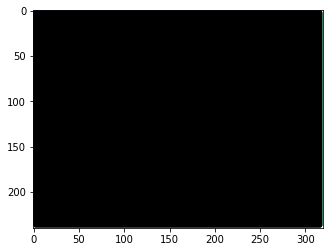

In [199]:

g = y_cap * 255
plt.imshow(torch.from_numpy(np.array(g.detach()).squeeze()).permute(1,2,0))

AttributeError: 'Tensor' object has no attribute 'named_parameters'

In [166]:
vid[0].shape

torch.Size([3, 240, 320])

In [4]:
img_path = r"C:\\Users\\grish\\Pictures\\spongegar.png"
import numpy as np
from PIL import Image
img = Image.open(img_path).convert("RGB")
print(img.size)
x = transforms.ToTensor()(img).unsqueeze(0)
x.shape


(225, 225)


torch.Size([1, 3, 225, 225])

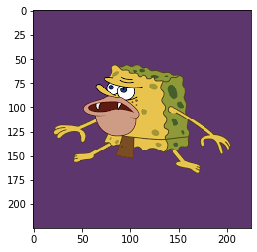

In [5]:
import matplotlib.pyplot as plt
import torchvision
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

imshow(torchvision.utils.make_grid(x))

In [6]:
i = AE(input_shape=225)

In [7]:
a = i(x)
b = i(x)

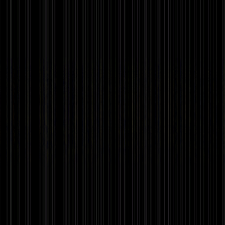

In [8]:
transforms.ToPILImage()(a.squeeze())

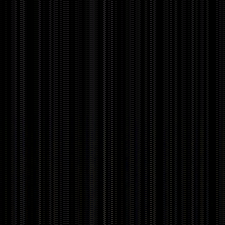

In [9]:
c = torch.cat((a, b), dim=1)
transforms.ToPILImage()(c.squeeze())
# c.shape

In [3]:
from threading import Thread
import sys
import cv2
from queue import Queue

In [1]:
class FileVideoStream:
    def __init__(self, path, queueSize=256):
        self.stream = cv2.VideoCapture(path)
        self.stopped = False
        self.Q = Queue(maxsize=queueSize)

    def start(self):
        t = Thread(target=self.update, args=())
        t.daemon = True
        t.start()
        return self

    def update(self):
        while True:
            if self.stopped:
                return
            if not self.Q.full():
                (grabbed, frame) = self.stream.read()
                if not grabbed:
                    self.stop()
                    return
                self.Q.put(frame)

    def read(self):
        return self.Q.get()

    def more(self):
        return self.Q.qsize() > 0

    def stop(self):
        self.stopped = True

In [4]:
from imutils.video import FileVideoStream
from imutils.video import FPS
import numpy as np
import argparse
import imutils
import time
import cv2

In [3]:
ap = argparse.ArgumentParser()
ap.add_argument("-v", "--video", required=True, help="path to input video file")
args = vars(ap.parse_args())


usage: ipykernel_launcher [-h] -v VIDEO
ipykernel_launcher: error: the following arguments are required: -v/--video


SystemExit: 2

In [4]:
ff = np.array([[1,2,3],[4,5,6], [6,7,8]])
torch.from_numpy(ff).unsqueeze(0).shape

NameError: name 'torch' is not defined

In [82]:
from read_frames import ReadFrames
vid = ReadFrames(5).extract_frames("C:\\Users\\grish\\Desktop\\VFI\\UCF101\\UCF-101\\Archery\\v_Archery_g01_c02.avi")
vid

tensor([[[[ 82,  73,  40,  ..., 146, 208, 244],
          [ 87,  78,  44,  ..., 152, 208, 237],
          [ 94,  86,  50,  ..., 156, 209, 233],
          ...,
          [131, 131, 128,  ..., 148, 148, 148],
          [133, 133, 129,  ..., 148, 148, 148],
          [133, 133, 129,  ..., 148, 148, 148]],

         [[ 83,  74,  41,  ..., 133, 195, 231],
          [ 88,  79,  45,  ..., 139, 195, 224],
          [ 95,  87,  51,  ..., 143, 196, 220],
          ...,
          [ 73,  73,  75,  ..., 183, 183, 183],
          [ 73,  73,  74,  ..., 183, 183, 183],
          [ 73,  73,  74,  ..., 183, 183, 183]],

         [[ 71,  62,  29,  ..., 126, 188, 224],
          [ 76,  67,  33,  ..., 132, 188, 217],
          [ 83,  75,  39,  ..., 136, 189, 213],
          ...,
          [ 61,  61,  61,  ..., 202, 202, 202],
          [ 61,  61,  61,  ..., 202, 202, 202],
          [ 61,  61,  61,  ..., 202, 202, 202]]],


        [[[ 80,  81,  73,  ..., 132, 139, 197],
          [ 86,  87,  80,  ..., 138

In [5]:
vid.shape

torch.Size([128, 3, 240, 320])

In [26]:
np.transpose(np.array(vid)).shape

(3, 320, 240)

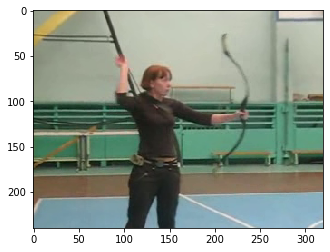

In [29]:
plt.imshow(vid)

In [4]:
vid.unsqueeze(0).shap

torch.Size([1, 240, 320, 3])

In [23]:
import numpy as np
gg = np.expand_dims(np.array([1,2,3]), axis=0)
gf = np.expand_dims(np.array([5,6,7]), axis=0)
np.concatenate((gg, gf)).shape

(2, 3)

In [6]:
import os
from os.path import join, getsize
paths = []
for root, dirs, files in os.walk(r'UCF101\UCF-101'):
    for file in files:
        paths.append(str(os.path.join(root, file)))

In [7]:
paths[:10]

['UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c01.avi',
 'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c02.avi',
 'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c03.avi',
 'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c04.avi',
 'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c05.avi',
 'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c06.avi',
 'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g02_c01.avi',
 'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g02_c02.avi',
 'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g02_c03.avi',
 'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g02_c04.avi']

In [71]:
# from read_frames import ReadFrames
vid = ReadFrames1(5).extract_frames(paths[1])
len(vid[:65])

Reading video...


65

In [30]:
vid.size()

torch.Size([128, 3, 240, 320])

In [32]:
# from read_frames import ReadFrames
l = []
for i in range(len(paths)):
    if i == 1:
        continue
    else:
        vid = ReadFrames(5).extract_frames('C:\\Users\\grish\\Desktop\\VFI\\' + paths[i])
        l.append(vid.shape[0])

Reading video...
Reading video...
Reading video...
Reading video...
Reading video...


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-2b5g8ysb\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [5]:
import torch
from PIL import Image
class ReadFrames:
    def __init__(self, batch_size):
        # self.frameTensor = []
        self.batch_size = batch_size

    def extract_frames(self, path):

        print("Reading video...")
        fvs = FileVideoStream(path).start()
        time.sleep(1.0)
        fps = FPS().start()
        frameTensor = []
        while fvs.more():
            frame = fvs.read()
            print(len(frame))
            # frame = Image.fromarray(frame)
            # frame = Image.frombytes('RGB', frame.size, frame.rgb)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frameTensor.append(frame)
            cv2.waitKey(1)
            fps.update()
            fps.stop()
            fvs.stop()
        frameTensor = np.array(frameTensor)
        frameTensor = torch.from_numpy(frameTensor)
        frameTensor = frameTensor.permute(0, 3, 1, 2)
        return frameTensor

In [35]:
l = []
for i in range(len(paths)):
    if i == 1:
        continue
    else:
        vid = ReadFrames(5).extract_frames('C:\\Users\\grish\\Desktop\\VFI\\' + paths[i])
        l.append(vid.shape[0])

Reading video...
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
Reading video...
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
24

TypeError: object of type 'NoneType' has no len()

In [46]:
class ReadFrames1:
    def __init__(self, batch_size):
        # self.frameTensor = []
        self.batch_size = batch_size

    def extract_frames(self, path):

        print("Reading video...")
        cap = cv2.VideoCapture(path)
        # time.sleep(1.0)
        # fps = FPS().start()
        frameTensor = []
        while cap.isOpened():
            ret, frame = cap.read()
            # frame = Image.fromarray(frame)
            # frame = Image.frombytes('RGB', frame.size, frame.rgb)
            if ret == True:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frameTensor.append(frame)

            else:
                break
            # fps.update()
            # fps.stop()
            # fvs.stop()
        frameTensor = np.array(frameTensor)
        frameTensor = torch.from_numpy(frameTensor)
        frameTensor = frameTensor.permute(0, 3, 1, 2)
        return frameTensor

In [64]:
l = []
for i in range(len(paths)):
    if i == 1:
        continue
    else:
        vid = ReadFrames1(5).extract_frames('C:\\Users\\grish\\Desktop\\VFI\\' + paths[i])
        l.append(vid.shape[0])

NameError: name 'paths' is not defined

In [6]:
import matplotlib.pyplot as plt
plt.imshow(vid[0].permute(1,2,0))

NameError: name 'vid' is not defined

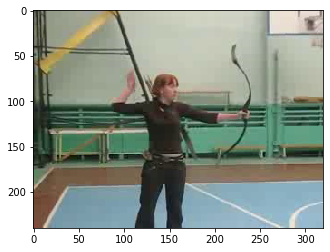

In [90]:
plt.imshow(vid[1].permute(1,2,0))

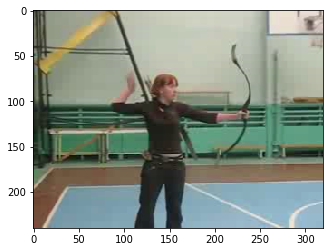

In [138]:
fr = (((vid[0] // 2) + (vid[1] // 2)))
plt.imshow(fr.permute(1,2,0))

In [137]:
(((vid[0] // 2) + (vid[1] // 2)))

tensor([[[ 81,  76,  56,  ..., 139, 173, 220],
         [ 86,  82,  62,  ..., 145, 176, 217],
         [ 93,  90,  68,  ..., 149, 180, 216],
         ...,
         [131, 131, 129,  ..., 148, 148, 148],
         [132, 132, 129,  ..., 148, 148, 148],
         [132, 132, 129,  ..., 148, 148, 148]],

        [[ 81,  78,  57,  ..., 125, 160, 207],
         [ 87,  83,  62,  ..., 131, 163, 204],
         [ 94,  90,  69,  ..., 135, 167, 204],
         ...,
         [ 72,  72,  73,  ..., 182, 182, 182],
         [ 72,  72,  73,  ..., 182, 182, 182],
         [ 72,  72,  73,  ..., 182, 182, 182]],

        [[ 69,  66,  45,  ..., 119, 153, 200],
         [ 75,  71,  50,  ..., 125, 156, 197],
         [ 82,  78,  57,  ..., 129, 160, 196],
         ...,
         [ 60,  60,  60,  ..., 202, 202, 202],
         [ 60,  60,  60,  ..., 202, 202, 202],
         [ 60,  60,  60,  ..., 202, 202, 202]]], dtype=torch.uint8)

In [121]:
vid[0]

tensor([[[ 82,  73,  40,  ..., 146, 208, 244],
         [ 87,  78,  44,  ..., 152, 208, 237],
         [ 94,  86,  50,  ..., 156, 209, 233],
         ...,
         [131, 131, 128,  ..., 148, 148, 148],
         [133, 133, 129,  ..., 148, 148, 148],
         [133, 133, 129,  ..., 148, 148, 148]],

        [[ 83,  74,  41,  ..., 133, 195, 231],
         [ 88,  79,  45,  ..., 139, 195, 224],
         [ 95,  87,  51,  ..., 143, 196, 220],
         ...,
         [ 73,  73,  75,  ..., 183, 183, 183],
         [ 73,  73,  74,  ..., 183, 183, 183],
         [ 73,  73,  74,  ..., 183, 183, 183]],

        [[ 71,  62,  29,  ..., 126, 188, 224],
         [ 76,  67,  33,  ..., 132, 188, 217],
         [ 83,  75,  39,  ..., 136, 189, 213],
         ...,
         [ 61,  61,  61,  ..., 202, 202, 202],
         [ 61,  61,  61,  ..., 202, 202, 202],
         [ 61,  61,  61,  ..., 202, 202, 202]]], dtype=torch.uint8)

In [122]:
vid[1]

tensor([[[ 80,  81,  73,  ..., 132, 139, 197],
         [ 86,  87,  80,  ..., 138, 145, 198],
         [ 93,  94,  87,  ..., 142, 152, 201],
         ...,
         [133, 133, 131,  ..., 148, 148, 148],
         [133, 133, 131,  ..., 148, 148, 148],
         [133, 133, 131,  ..., 148, 148, 148]],

        [[ 81,  82,  74,  ..., 119, 126, 184],
         [ 87,  88,  81,  ..., 125, 132, 185],
         [ 94,  95,  88,  ..., 129, 139, 188],
         ...,
         [ 73,  73,  73,  ..., 183, 183, 183],
         [ 73,  73,  73,  ..., 183, 183, 183],
         [ 73,  73,  73,  ..., 183, 183, 183]],

        [[ 69,  70,  62,  ..., 112, 119, 177],
         [ 75,  76,  69,  ..., 118, 125, 178],
         [ 82,  83,  76,  ..., 122, 132, 181],
         ...,
         [ 61,  61,  61,  ..., 202, 202, 202],
         [ 61,  61,  61,  ..., 202, 202, 202],
         [ 61,  61,  61,  ..., 202, 202, 202]]], dtype=torch.uint8)

In [129]:
f = torch.tensor([[[3,4,3], [4,3,4], [5,5,5]], [[3,4,3], [4,3,4], [5,5,5]], [[3,4,3], [4,3,4], [5,5,5]]], dtype=torch.uint8)
g = torch.tensor([[[3,4,3], [4,3,4], [5,5,5]], [[3,4,3], [4,3,4], [5,5,5]], [[3,4,3], [4,3,4], [5,5,5]]], dtype=torch.uint8)
f + g

tensor([[[ 6,  8,  6],
         [ 8,  6,  8],
         [10, 10, 10]],

        [[ 6,  8,  6],
         [ 8,  6,  8],
         [10, 10, 10]],

        [[ 6,  8,  6],
         [ 8,  6,  8],
         [10, 10, 10]]], dtype=torch.uint8)

In [140]:
(f.unsqueeze(0) + g.unsqueeze(0)).shape

torch.Size([1, 3, 3, 3])

In [3]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

ModuleAttributeError: 'ConvNet' object has no attribute 'info'

In [4]:
num_epochs = 2
num_classes = 10
batch_size = 100
learning_rate = 0.001
DATA_PATH = 'C:\\Users\\grish\\Desktop'

In [5]:
import torchvision
import torchvision.transforms as transforms
# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

In [6]:
from torch.utils.data import DataLoader
model = ConvNet()
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [20]:
# Train the model
import numpy as np
li = []
n = np.zeros((1000, 3136))
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        print(outputs.grad, outputs.requires_grad)
        optimizer.zero_grad()
        loss.backward()
        print(model.fc1.weight.grad, outputs.requires_grad, model.fc1.weight.grad.shape)
        optimizer.step()
        li.append(model.fc1.weight.grad)

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)
        print(outputs.grad, outputs.requires_grad)
        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
    
print(outputs.grad, outputs.requires_grad)

e-09],
        [ 8.8987e-09,  7.2768e-09,  3.7728e-09,  ...,  2.0738e-07,
         -1.3314e-10, -2.7812e-09]]) True torch.Size([1000, 3136])
None True
None True
tensor([[ 2.5872e-05,  8.1031e-07,  1.3950e-07,  ..., -2.1878e-05,
         -6.9908e-07, -3.5565e-05],
        [-4.5360e-05, -5.7193e-07,  2.8075e-07,  ...,  9.4007e-07,
          1.9326e-06,  2.5091e-05],
        [-1.8424e-05, -6.7794e-07, -2.4925e-07,  ...,  1.1197e-06,
         -6.9019e-07,  3.0005e-05],
        ...,
        [ 8.1673e-05,  7.5229e-07,  1.2896e-07,  ...,  5.7269e-05,
         -3.3597e-07, -3.3687e-05],
        [-1.5602e-04, -1.6753e-07, -1.8935e-07,  ..., -6.7385e-05,
         -5.1802e-07,  7.0633e-06],
        [ 1.8362e-04,  2.8308e-07, -7.2519e-07,  ...,  1.1678e-04,
         -4.7929e-07, -1.2947e-05]]) True torch.Size([1000, 3136])
None True
None True
tensor([[-1.6863e-07, -4.9554e-07,  3.6176e-08,  ..., -2.7277e-09,
         -2.2956e-05, -3.3213e-06],
        [-4.4307e-06,  3.9609e-07, -8.9716e-09,  ..., 

In [22]:
li

-07,  1.4243e-06,  ..., -6.6219e-08,
          -1.9342e-08, -9.2352e-11],
         [ 1.0049e-07,  5.6918e-08, -7.8155e-07,  ...,  7.3732e-08,
          -1.9266e-07,  8.2126e-11],
         [ 9.0489e-08,  5.8304e-08, -1.5254e-06,  ...,  3.0507e-08,
           8.0791e-08, -2.0546e-10],
         ...,
         [ 6.8787e-07,  5.6488e-08,  2.2667e-06,  ...,  1.0430e-07,
           3.2960e-07,  1.2252e-09],
         [-9.9175e-07, -1.8120e-07, -1.6654e-07,  ..., -5.1244e-08,
          -7.6409e-08,  7.4453e-10],
         [-2.6417e-09,  8.8800e-08, -4.5104e-07,  ...,  1.1258e-07,
           5.4705e-07,  1.5297e-09]]),
 tensor([[-2.8172e-07, -1.1197e-07,  1.4243e-06,  ..., -6.6219e-08,
          -1.9342e-08, -9.2352e-11],
         [ 1.0049e-07,  5.6918e-08, -7.8155e-07,  ...,  7.3732e-08,
          -1.9266e-07,  8.2126e-11],
         [ 9.0489e-08,  5.8304e-08, -1.5254e-06,  ...,  3.0507e-08,
           8.0791e-08, -2.0546e-10],
         ...,
         [ 6.8787e-07,  5.6488e-08,  2.2667e-06,  ...,  

In [11]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

Test Accuracy of the model on the 10000 test images: 99.07000000000001 %


In [46]:
l = [[1,2,3],[4,54,65],[4,4,4]]
np.array(l).sum(axis=1)

array([  6, 123,  12])

In [35]:
train = np.array([np.random.rand(3,3), np.random.rand(3,3), np.random.rand(3,3)])
train

array([[[0.84294579, 0.27513599, 0.86632073],
        [0.04338997, 0.11115651, 0.19324806],
        [0.37901285, 0.86748396, 0.16089338]],

       [[0.67536632, 0.4199775 , 0.00640042],
        [0.42006915, 0.54840664, 0.45801009],
        [0.81852916, 0.42250271, 0.37659971]],

       [[0.34626362, 0.42396405, 0.16926539],
        [0.25255433, 0.11200641, 0.0287514 ],
        [0.15708429, 0.13221392, 0.13644311]]])

In [37]:
for itera, batch in enumerate(train, 1):
    print(itera, batch)

1 [[0.84294579 0.27513599 0.86632073]
 [0.04338997 0.11115651 0.19324806]
 [0.37901285 0.86748396 0.16089338]]
2 [[0.67536632 0.4199775  0.00640042]
 [0.42006915 0.54840664 0.45801009]
 [0.81852916 0.42250271 0.37659971]]
3 [[0.34626362 0.42396405 0.16926539]
 [0.25255433 0.11200641 0.0287514 ]
 [0.15708429 0.13221392 0.13644311]]


In [59]:
from read_frames import ReadFrames
def get_batch(path):
    frames = ReadFrames().extract_frames(path)
    # sub_batches = len(frames) // BATCH_SIZE
    return frames[:16]


def all_batches():
    paths = ['UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c01.avi',
            'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c02.avi',
            'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c03.avi',
            'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c04.avi',
            'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c05.avi',
            'UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c06.avi']
    list_of_batches = []
    for i in paths:
        list_of_batches.append(get_batch(path=i))

    return (list_of_batches)

In [60]:
get = get_batch('UCF101\\UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c01.avi')
allb = all_batches()

Reading video...
Reading video...
Reading video...
Reading video...
Reading video...
Reading video...
Reading video...


In [7]:
import imageio
i = imageio.imread(r'C:\Users\grish\Pictures\Saved Pictures\monaco-city-france-2560x1440.jpg', pilmode='RGB')
print(i.shape)
i = np.array(i)
print(i.shape)
i = torch.from_numpy(i)
print(i.shape)
from model import Model
with torch.no_grad():
    m = Model()
    e = m(i.unsqueeze(0).permute(0, 3, 1, 2).float()/255)

(1440, 2560, 3)
(1440, 2560, 3)
torch.Size([1440, 2560, 3])


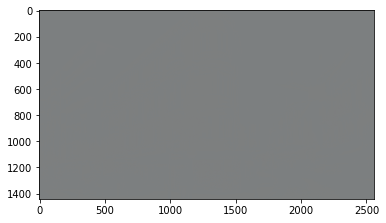

In [8]:
plt.imshow((e.squeeze(0)).permute(1,2,0), vmin=0, vmax=1)

In [19]:
e[0].shape

torch.Size([3, 1440, 2560])

In [5]:
from ignite.metrics import SSIM

In [155]:
ssim = SSIM(data_range=1.0)

In [156]:
ssim.update([e[0].unsqueeze(0), i.unsqueeze(0).float().permute(0,3,1,2)/255])

In [157]:
ssim

In [158]:
print(ssim)

In [161]:
ssim.compute()

tensor(0.2541, dtype=torch.float64)

In [160]:
ssim.compute().item()

0.25414289596599576

In [9]:
import misc_functions

In [10]:
i.shape

torch.Size([1440, 2560, 3])

In [19]:
from read_frames import ReadFrames
import cv2
g = ReadFrames().extract_frames('UCF101\\UCF-101\\Bowling\\v_Bowling_g01_c04.avi')

Reading video...


In [12]:
cap = cv2.VideoCapture('UCF101\\UCF-101\\Bowling\\v_Bowling_g01_c04.avi')
        # time.sleep(1.0)
        # fps = FPS().start()
        # frameTensor = []
ret, frame = cap.read()
            # frame = Image.fromarray(frame)
            # frame = Image.frombytes('RGB', frame.size, frame.rgb)
# if ret == True:
    # if train == True:
                    # frame = frame[]
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
print(frame.shape)
y = np.random.randint(0, frame.shape[0] - 90)
x = np.random.randint(0, frame.shape[1] - 90)
h = frame[y: y + 90, x: x + 90]
    # frameTensor.append(frame)

(240, 320, 3)


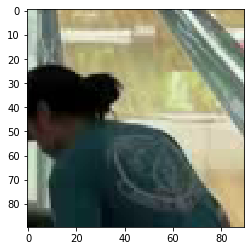

In [13]:
import matplotlib.pyplot as plt
plt.imshow(h)

In [14]:
h.shape

(90, 90, 3)

In [15]:
t = torch.tensor([[[1,2,23],[1,2,2],[2,3,4]]])
t.shape

torch.Size([1, 3, 3])

In [13]:
t.squeeze().shape

torch.Size([3, 3])

In [54]:
from alt_model import Alt_Model
with torch.no_grad():
    ns = Model()
    ns.load_state_dict(torch.load('model_states/model_state_original.pth'))

In [55]:
pre = ns((i.float()/255).unsqueeze(0).permute(0,3,1,2))

In [57]:
pre.shape

torch.Size([1, 3, 1440, 2560])

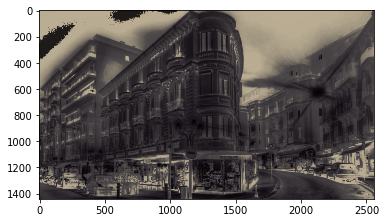

In [72]:
plt.imshow((pre.squeeze(0).permute(1,2,0)).detach().numpy())

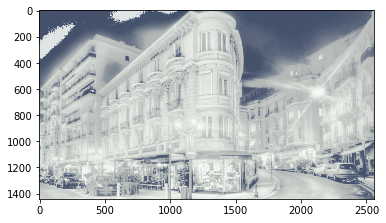

In [73]:
som = 1 - pre
plt.imshow((som.squeeze(0).permute(1,2,0)).detach().numpy())

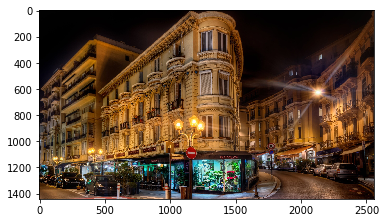

In [240]:
plt.imshow(i)

In [16]:
i.shape

torch.Size([1440, 2560, 3])

In [245]:
pre.shape

torch.Size([1, 3, 1440, 2560])

In [246]:
hery = i.unsqueeze(0).permute(0,3,1,2)
hery.shape

torch.Size([1, 3, 1440, 2560])

In [252]:
yt = torch.cat((hery,pre), axis=1)
yt.shape

torch.Size([1, 6, 1440, 2560])

In [17]:
from alt_model import Alt_Model
with torch.no_grad():
    mo = Model()
    mo.load_state_dict(torch.load('model_states/model_state_original.pth'))
ui = mo(((g[110].float()/255).unsqueeze(0))/2 + ((g[114].float()/255).unsqueeze(0))/2)

NameError: name 'g' is not defined

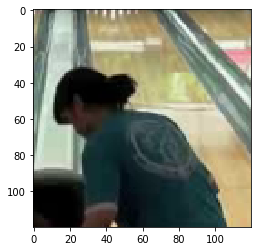

In [66]:
plt.imshow(g[1].permute(1,2,0))

In [67]:
ui.shape

torch.Size([1, 3, 120, 120])

In [68]:
ui

tensor([[[[0.3988, 0.3358, 0.3149,  ..., 0.4200, 0.4446, 0.4826],
          [0.3197, 0.2369, 0.2111,  ..., 0.3559, 0.3987, 0.4657],
          [0.2824, 0.1949, 0.1688,  ..., 0.2999, 0.3514, 0.4394],
          ...,
          [0.2641, 0.1740, 0.1436,  ..., 0.0990, 0.1521, 0.3011],
          [0.3007, 0.2206, 0.1892,  ..., 0.1472, 0.2016, 0.3412],
          [0.3861, 0.3384, 0.3169,  ..., 0.2875, 0.3334, 0.4325]],

         [[0.3689, 0.3157, 0.3005,  ..., 0.4157, 0.4444, 0.4897],
          [0.2856, 0.2091, 0.1894,  ..., 0.3366, 0.3812, 0.4559],
          [0.2482, 0.1660, 0.1468,  ..., 0.2796, 0.3331, 0.4294],
          ...,
          [0.2343, 0.1469, 0.1229,  ..., 0.0842, 0.1390, 0.3005],
          [0.2819, 0.1965, 0.1704,  ..., 0.1307, 0.1866, 0.3343],
          [0.3826, 0.3212, 0.3008,  ..., 0.2674, 0.3095, 0.4083]],

         [[0.3974, 0.3500, 0.3337,  ..., 0.4078, 0.4250, 0.4549],
          [0.3217, 0.2443, 0.2194,  ..., 0.3332, 0.3632, 0.4193],
          [0.2895, 0.2009, 0.1730,  ..., 0

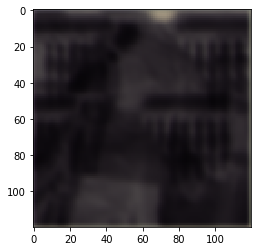

In [69]:
plt.imshow(ui.detach().squeeze().permute(1,2,0).numpy())

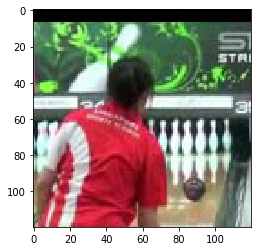

In [70]:
plt.imshow(g[110].permute(1,2,0))

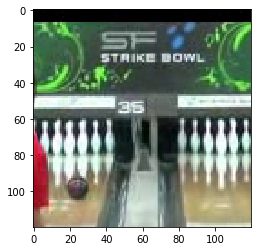

In [24]:
plt.imshow(g[112].permute(1,2,0))

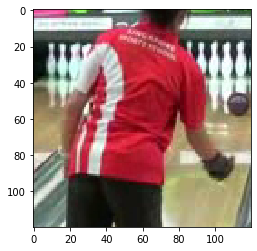

In [25]:
plt.imshow(g[114].permute(1,2,0))

In [20]:
g[113].shape

torch.Size([3, 90, 90])

In [30]:
vvv = np.array(((3,4,5),(3,4,5)))
vvv.shape[0]

2

In [75]:
wer = torch.tensor([])
wer

tensor([])

In [121]:
wer = torch.cat((wer, ui), axis=0)
wer = torch.cat((wer, ui), axis=0)
wer = torch.cat((wer, ui), axis=0)

In [124]:
wer.shape

torch.Size([3, 3, 120, 120])

In [123]:
ui

tensor([[[[0.3988, 0.3358, 0.3149,  ..., 0.4200, 0.4446, 0.4826],
          [0.3197, 0.2369, 0.2111,  ..., 0.3559, 0.3987, 0.4657],
          [0.2824, 0.1949, 0.1688,  ..., 0.2999, 0.3514, 0.4394],
          ...,
          [0.2641, 0.1740, 0.1436,  ..., 0.0990, 0.1521, 0.3011],
          [0.3007, 0.2206, 0.1892,  ..., 0.1472, 0.2016, 0.3412],
          [0.3861, 0.3384, 0.3169,  ..., 0.2875, 0.3334, 0.4325]],

         [[0.3689, 0.3157, 0.3005,  ..., 0.4157, 0.4444, 0.4897],
          [0.2856, 0.2091, 0.1894,  ..., 0.3366, 0.3812, 0.4559],
          [0.2482, 0.1660, 0.1468,  ..., 0.2796, 0.3331, 0.4294],
          ...,
          [0.2343, 0.1469, 0.1229,  ..., 0.0842, 0.1390, 0.3005],
          [0.2819, 0.1965, 0.1704,  ..., 0.1307, 0.1866, 0.3343],
          [0.3826, 0.3212, 0.3008,  ..., 0.2674, 0.3095, 0.4083]],

         [[0.3974, 0.3500, 0.3337,  ..., 0.4078, 0.4250, 0.4549],
          [0.3217, 0.2443, 0.2194,  ..., 0.3332, 0.3632, 0.4193],
          [0.2895, 0.2009, 0.1730,  ..., 0

In [114]:
ler

tensor([[[[0.3988, 0.3358, 0.3149,  ..., 0.4200, 0.4446, 0.4826],
          [0.3197, 0.2369, 0.2111,  ..., 0.3559, 0.3987, 0.4657],
          [0.2824, 0.1949, 0.1688,  ..., 0.2999, 0.3514, 0.4394],
          ...,
          [0.2641, 0.1740, 0.1436,  ..., 0.0990, 0.1521, 0.3011],
          [0.3007, 0.2206, 0.1892,  ..., 0.1472, 0.2016, 0.3412],
          [0.3861, 0.3384, 0.3169,  ..., 0.2875, 0.3334, 0.4325]],

         [[0.3689, 0.3157, 0.3005,  ..., 0.4157, 0.4444, 0.4897],
          [0.2856, 0.2091, 0.1894,  ..., 0.3366, 0.3812, 0.4559],
          [0.2482, 0.1660, 0.1468,  ..., 0.2796, 0.3331, 0.4294],
          ...,
          [0.2343, 0.1469, 0.1229,  ..., 0.0842, 0.1390, 0.3005],
          [0.2819, 0.1965, 0.1704,  ..., 0.1307, 0.1866, 0.3343],
          [0.3826, 0.3212, 0.3008,  ..., 0.2674, 0.3095, 0.4083]],

         [[0.3974, 0.3500, 0.3337,  ..., 0.4078, 0.4250, 0.4549],
          [0.3217, 0.2443, 0.2194,  ..., 0.3332, 0.3632, 0.4193],
          [0.2895, 0.2009, 0.1730,  ..., 0

In [125]:
from model_unet import UNet

In [142]:
import torch
import torch.nn.functional as F
import torch.nn as nn


class U_Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.down1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.down2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.down3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.down4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.down5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3)
        self.up1 = nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3)
        self.up2 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3)
        self.up3 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3)
        self.up4 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3)
        self.up5 = nn.Conv2d(in_channels=32, out_channels=3, kernel_size=3)

    def forward(self, x):

        x_shape = x.shape

        # -----------------------------------------------------
        # downsampling part

        x = F.pad(x, pad=(1,1,1,1))
        x = self.down1(x)
        x = F.relu(x)

        x = F.pad(x, pad=(1,1,1,1))
        x = self.down2(x)
        x = F.relu(x)

        x = F.pad(x, pad=(1,1,1,1))
        x = self.down3(x)
        x = F.relu(x)

        x = F.pad(x, pad=(1,1,1,1))
        x = self.down4(x)
        x = F.relu(x)

        x = F.pad(x, pad=(1,1,1,1))
        x = self.down5(x)
        x = F.relu(x)

        # -----------------------------------------------------
        # upsampling part

        x = F.pad(x, pad=(1,1,1,1))
        x = self.up1(x)
        x = F.relu(x)

        x = F.pad(x, pad=(1,1,1,1))
        x = self.up2(x)
        x = F.relu(x)
        
        x = F.pad(x, pad=(1,1,1,1))
        x = self.up3(x)
        x = F.relu(x)

        x = F.pad(x, pad=(1,1,1,1))
        x = self.up4(x)
        x = F.relu(x)

        x = F.pad(x, pad=(1,1,1,1))
        x = self.up5(x)
        x = F.sigmoid(x)

        # -----------------------------------------------------

        assert x.shape == x_shape, f'x.shape: {x.shape}, x_shape: {x_shape}'

        return x

In [143]:
er = U_Net()
ert = er((g[114].float()/255).unsqueeze(0))

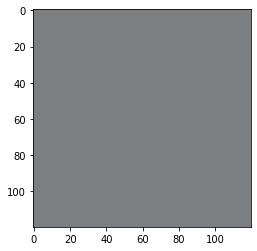

In [147]:
plt.imshow(ert.detach().squeeze().permute(1,2,0).numpy())

In [21]:
# if torch.cuda.is_available():
#     print("GPU used")
#     device = torch.device("cuda")
# else:
    # print("CPU used")
from model_unet import UNet
# device = torch.device("cpu")
with torch.no_grad():
    mo = UNet()
    # mo.to(device)
    mo.load_state_dict(torch.load('model_states/model_state_yet_another.pth'))

# vui = g[110].to(device)
ui = mo(((g[110].float()/255).unsqueeze(0))/2 + ((g[114].float()/255).unsqueeze(0))/2)

In [22]:
ui.shape

torch.Size([1, 3, 90, 90])

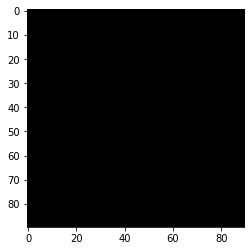

In [24]:
plt.imshow(ui.detach().squeeze().permute(1,2,0).numpy())

In [25]:
ui

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], grad_fn=<SigmoidBackward>)

In [41]:
from model import Model
# device = torch.device("cpu")
with torch.no_grad():
    mo = Model()
    # mo.to(device)
    mo.load_state_dict(torch.load('model_states/model_state_Model.pth'))

# vui = g[110].to(device)
# ui = mo(((g[110].float()/255).unsqueeze(0))/2 + ((g[114].float()/255).unsqueeze(0))/2)
ui = mo(i.unsqueeze(0).permute(0,3,1,2).float()/255)

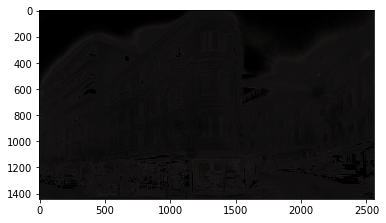

In [42]:
plt.imshow(ui.detach().squeeze().permute(1,2,0).numpy())

In [46]:
from model_unet import UNet
# device = torch.device("cpu")
with torch.no_grad():
    mo = UNet()
    # mo.to(device)
    mo.load_state_dict(torch.load('model_states/model_state_UNet.pth'))

# vui = g[110].to(device)
# ui = mo(((g[110].float()/255).unsqueeze(0))/2 + ((g[114].float()/255).unsqueeze(0))/2)
ui = mo(g[110].unsqueeze(0).float()/255)

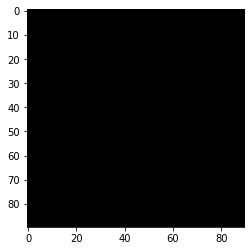

In [48]:
plt.imshow(ui.detach().squeeze().permute(1,2,0).numpy())

In [49]:
ui

tensor([[[[6.8883e-19, 8.2227e-28, 3.0145e-33,  ..., 9.8320e-35,
           4.4979e-25, 6.8606e-12],
          [3.5967e-30, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 5.1511e-20],
          [1.7846e-38, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 5.6873e-25],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           1.5687e-31, 3.5973e-14],
          [2.1544e-35, 0.0000e+00, 0.0000e+00,  ..., 8.9796e-34,
           1.4696e-23, 1.5982e-10],
          [1.2963e-19, 2.2034e-31, 0.0000e+00,  ..., 6.7552e-20,
           3.7077e-14, 2.1535e-06]],

         [[3.6959e-08, 9.0643e-13, 5.8712e-15,  ..., 9.7865e-16,
           1.7811e-11, 3.9800e-06],
          [2.8162e-11, 4.0093e-21, 4.4816e-27,  ..., 4.7969e-32,
           1.9150e-25, 7.2818e-15],
          [1.2310e-13, 4.1486e-27, 3.4366e-36,  ..., 0.0000e+00,
           1.3435e-35, 2.9976e-21],
          ...,
          [2.1321e-15, 4.0226e-35, 0.0000e+00,  ..., 1.6242

In [50]:
from model import Model
# device = torch.device("cpu")
with torch.no_grad():
    mo = Model()
    # mo.to(device)
    mo.load_state_dict(torch.load('model_states/model_state_Model2.pth'))

# vui = g[110].to(device)
# ui = mo(((g[110].float()/255).unsqueeze(0))/2 + ((g[114].float()/255).unsqueeze(0))/2)
ui = mo(i.unsqueeze(0).permute(0,3,1,2).float()/255)

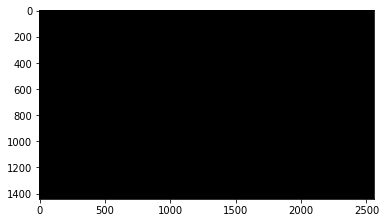

In [51]:
plt.imshow(ui.detach().squeeze().permute(1,2,0).numpy())

In [52]:
ui

tensor([[[[2.2710e-02, 2.8083e-03, 9.9004e-04,  ..., 1.0210e-04,
           5.3636e-04, 1.2175e-02],
          [3.1243e-03, 7.2030e-05, 1.0833e-05,  ..., 1.2663e-07,
           1.7923e-06, 4.1974e-04],
          [1.4587e-03, 1.6027e-05, 1.5734e-06,  ..., 4.1813e-09,
           1.0590e-07, 8.4217e-05],
          ...,
          [1.3348e-07, 1.0191e-12, 1.6878e-15,  ..., 3.5735e-07,
           4.3816e-06, 7.2065e-04],
          [3.6015e-06, 2.5704e-10, 1.4320e-12,  ..., 4.8189e-06,
           3.8054e-05, 2.5729e-03],
          [4.7214e-04, 1.7493e-06, 8.5580e-08,  ..., 5.6050e-04,
           2.0285e-03, 2.6530e-02]],

         [[2.2519e-02, 2.7628e-03, 8.2600e-04,  ..., 6.7449e-05,
           3.5282e-04, 1.0041e-02],
          [2.9589e-03, 5.8803e-05, 6.5168e-06,  ..., 4.7500e-08,
           7.4935e-07, 2.9402e-04],
          [1.1283e-03, 9.7680e-06, 6.8808e-07,  ..., 1.0292e-09,
           3.5069e-08, 5.3891e-05],
          ...,
          [5.4512e-08, 1.6730e-13, 1.2690e-16,  ..., 1.1206